In [108]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [22]:
import os
print(os.getcwd())

c:\Users\danie\Machine_Learning_House_Prediction_Project\notebooks


In [23]:
import os
os.chdir('..')  # Move one level up to the parent directory
print(os.getcwd())  # Confirm the new working directory

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [110]:
df = pd.read_csv('data/training_data/train.csv')
test_df = pd.read_csv('data/raw/test.csv')

In [109]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [101]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [113]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [104]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [106]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [31]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [32]:
df.dtypes[df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

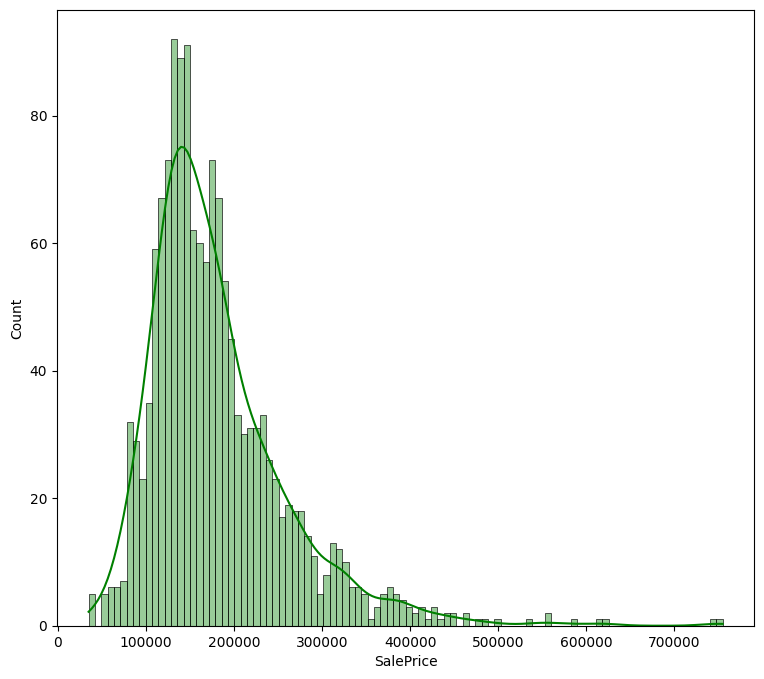

In [33]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], color='g', bins=100, kde=True, alpha=0.4)

### Scatter Plots Analysis

Scatter plots are a useful visualization tool to understand the relationship between two numerical variables. In this notebook, I have created scatter plots to analyze the relationship between different features and the target variable `SalePrice`.

By examining these scatter plots, we can identify patterns, trends, and potential outliers in the data. This visual analysis is crucial for feature selection and understanding the underlying relationships in the dataset.

In [34]:
set_of_outliers = set()

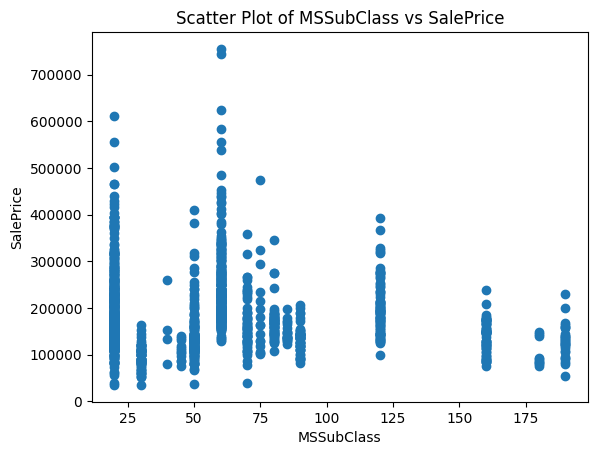

In [35]:
plt.scatter(x='MSSubClass', y='SalePrice', data=df)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of MSSubClass vs SalePrice')
plt.show()

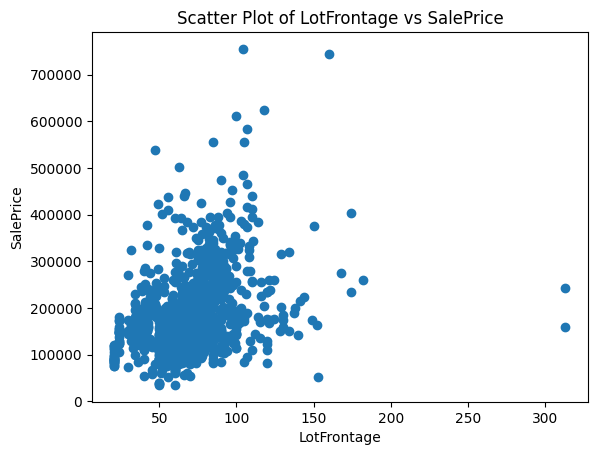

In [36]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of LotFrontage vs SalePrice')
plt.show()

We have identified that LotFrontage values greater than 300 are outliers. Therefore, we will remove these rows from the dataset to ensure a more accurate analysis.

In [37]:
df.query('LotFrontage > 300')[['Id', 'OverallCond', 'SalePrice']]
#Drop 935, 1299
set_of_outliers.add(935)
set_of_outliers.add(1299)

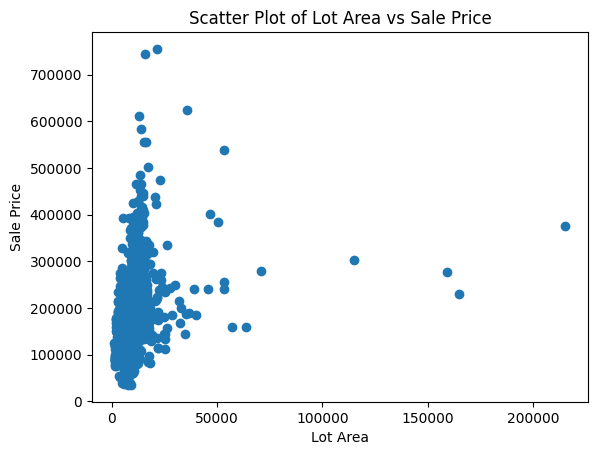

In [38]:
plt.scatter(x='LotArea', y='SalePrice', data=df)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Lot Area vs Sale Price')
plt.show()

There are outliers usually above 60,000.

In [39]:
df.query('LotArea > 60000')[['Id', 'OverallCond', 'SalePrice']]
#250, 314, 336, 452, 707, 1299
set_of_outliers.add(250)
set_of_outliers.add(314)
set_of_outliers.add(336)
set_of_outliers.add(452)
set_of_outliers.add(707)
set_of_outliers.add(1299)

In [40]:
pd.Series(stats.zscore(df['LotArea'])).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

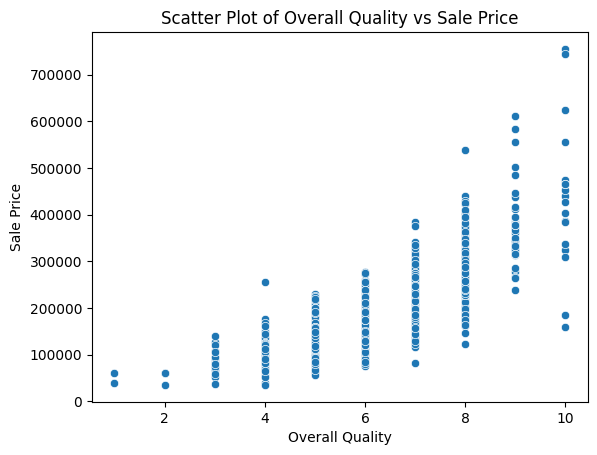

In [41]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Overall Quality vs Sale Price')
plt.show()

In [42]:
df.query('OverallQual == 10')[['Id', 'OverallCond', 'SalePrice']]

,Id,OverallCond,SalePrice
58,59,5,438780
185,186,9,475000
224,225,5,386250
389,390,5,426000
440,441,5,555000
515,516,5,402861
523,524,5,184750
583,584,9,325000
591,592,5,451950
691,692,6,755000


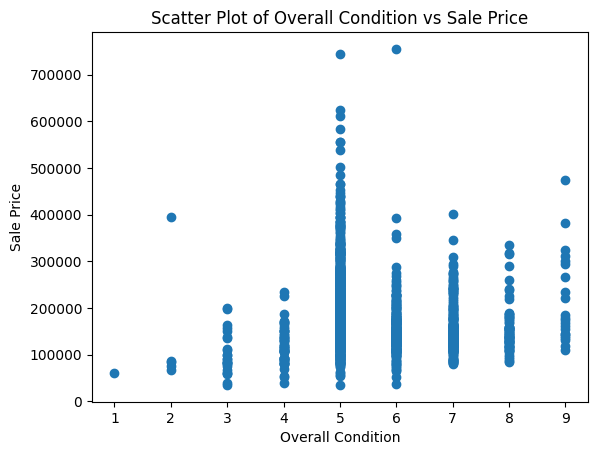

In [43]:
plt.scatter(x='OverallCond', y='SalePrice', data=df)
plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Overall Condition vs Sale Price")
plt.show()

In [44]:
df.query('OverallCond == 2')[['Id', 'OverallCond', 'SalePrice']]
#379
set_of_outliers.add(379)

In [45]:
df.query('OverallCond == 5 & SalePrice > 650000')[['Id', 'OverallCond', 'SalePrice']]
#1182
set_of_outliers.add(1182)


In [46]:
df.query('OverallCond == 6 & SalePrice > 650000')[['Id', 'OverallCond', 'SalePrice']]
#692
set_of_outliers.add(692)

Text(0.5, 1.0, 'Scatter Plot of Year Built vs Sale Price')

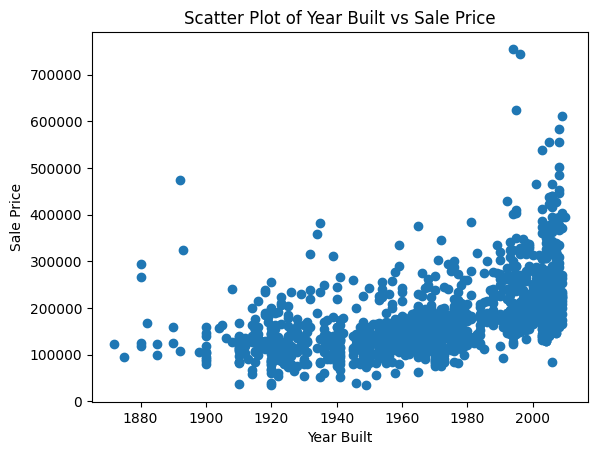

In [47]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data  =df)
plt.xlabel("Year Built")
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Year Built vs Sale Price')

In [48]:
df.query('YearBuilt < 1900 & SalePrice > 400000')[['Id', 'YearBuilt', 'SalePrice']]
#186
set_of_outliers.add(186)

Text(0.5, 1.0, 'Scatter Plot of Year Remodeled vs Sale Price')

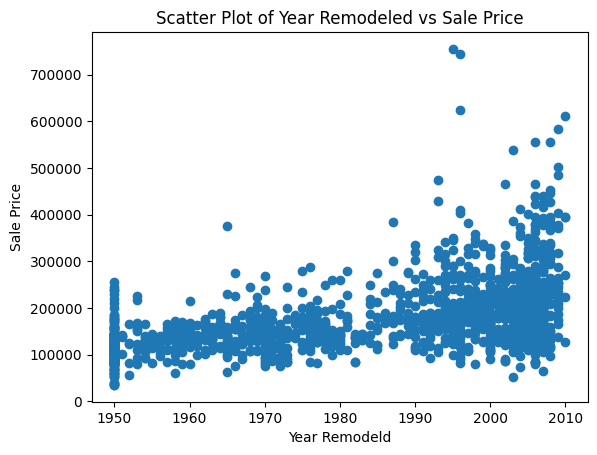

In [49]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df)
plt.xlabel("Year Remodeld")
plt.ylabel('Sale Price')
plt.title("Scatter Plot of Year Remodeled vs Sale Price")

In [50]:
df.query('1992 < YearRemodAdd < 2000 & SalePrice > 600000')[['Id', 'YearRemodAdd', 'SalePrice']]
#1183, 692, 1170
set_of_outliers.add(1183)

In [51]:
df.query('YearRemodAdd < 1970 & SalePrice > 300000')[['Id', 'YearRemodAdd', 'SalePrice']]
#314
set_of_outliers.add(314)

Text(0.5, 1.0, 'Scatter Plot of Masonry Veneer Area vs Sale Price')

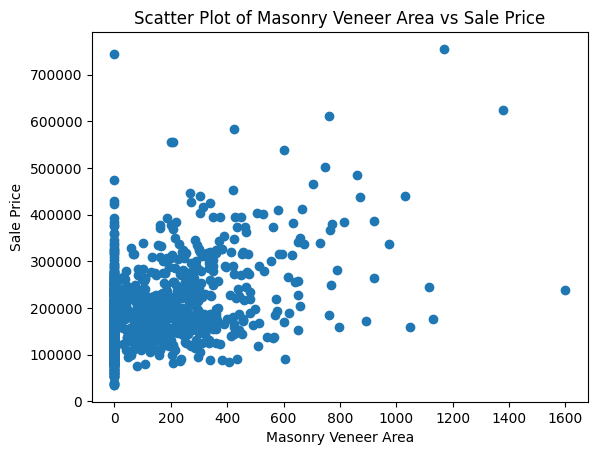

In [52]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df)
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Masonry Veneer Area vs Sale Price")

In [53]:
df.query('MasVnrArea > 1500')[['Id', 'MasVnrArea', 'SalePrice']]
#298
set_of_outliers.add(298)

Text(0.5, 1.0, 'Scatter Plot of Basement Finished Area vs Sale Price')

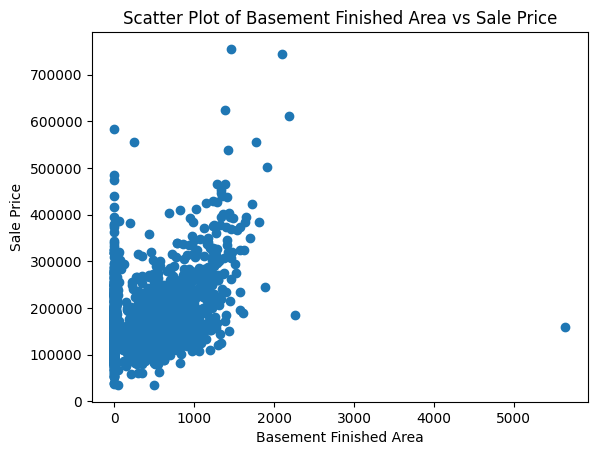

In [54]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = df)
plt.xlabel("Basement Finished Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Finished Area vs Sale Price")

In [55]:
df.query('BsmtFinSF1 > 5000')[['Id', 'BsmtFinSF1', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of Basement Finished Area 2 vs Sale Price')

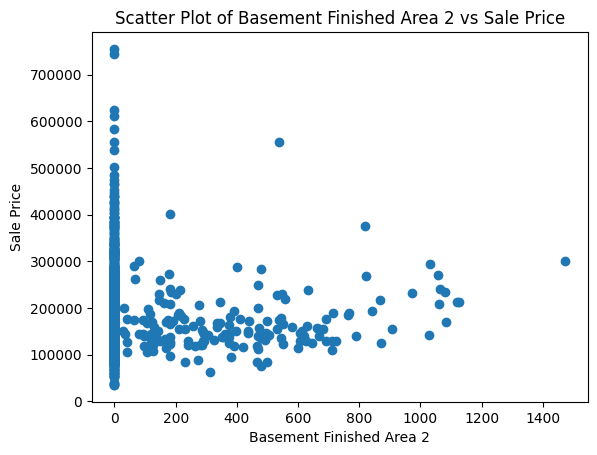

In [56]:
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data = df)
plt.xlabel("Basement Finished Area 2")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Finished Area 2 vs Sale Price")

In [57]:
df.query('BsmtFinSF2 > 400 & SalePrice > 500000')[['Id', 'BsmtFinSF2', 'SalePrice']]
#441
set_of_outliers.add(441)

Text(0.5, 1.0, 'Scatter Plot of Total Basement Area vs Sale Price')

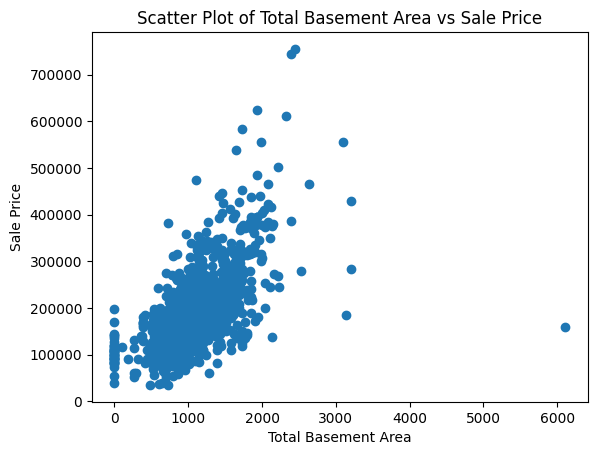

In [58]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df)
plt.xlabel("Total Basement Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Total Basement Area vs Sale Price")

In [59]:
df.query('TotalBsmtSF > 5000')[['Id', 'BsmtUnfSF', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of First Floor Area vs Sale Price')

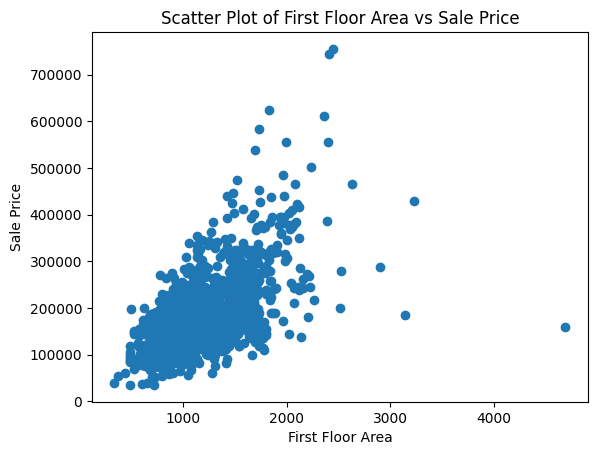

In [60]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = df)
plt.xlabel("First Floor Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of First Floor Area vs Sale Price")

In [61]:
df.query('`1stFlrSF` > 4000')[['Id', '1stFlrSF', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of Second Floor Area vs Sale Price')

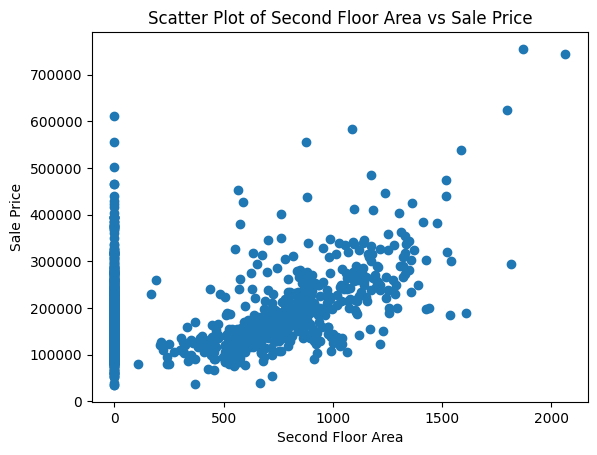

In [62]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = df)
plt.xlabel("Second Floor Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Second Floor Area vs Sale Price")

In [63]:
df.query('`2ndFlrSF` > 1500')[['Id', '2ndFlrSF', 'SalePrice']]

,Id,2ndFlrSF,SalePrice
58,59,1519,438780
118,119,1523,320000
185,186,1518,475000
304,305,1818,295000
523,524,1538,184750
691,692,1872,755000
745,746,1540,299800
769,770,1589,538000
1169,1170,1796,625000
1182,1183,2065,745000


Text(0.5, 1.0, 'Scatter Plot of Low Quality Finished Area vs Sale Price')

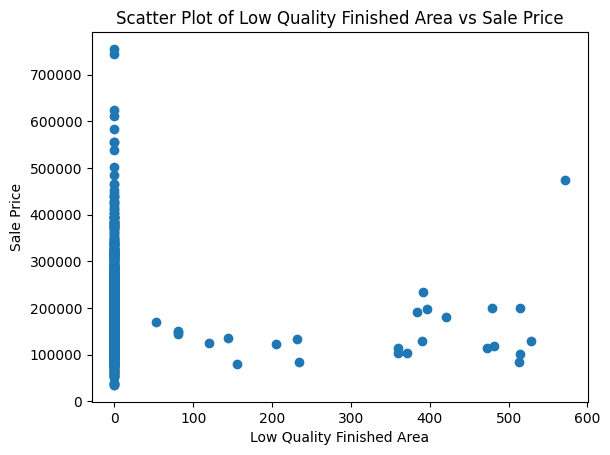

In [64]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = df)
plt.xlabel("Low Quality Finished Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Low Quality Finished Area vs Sale Price")

In [65]:
df.query('LowQualFinSF > 550')[['Id', 'LowQualFinSF', 'SalePrice']]
#186
set_of_outliers.add(186)

Text(0.5, 1.0, 'Scatter Plot of Ground Living Area vs Sale Price')

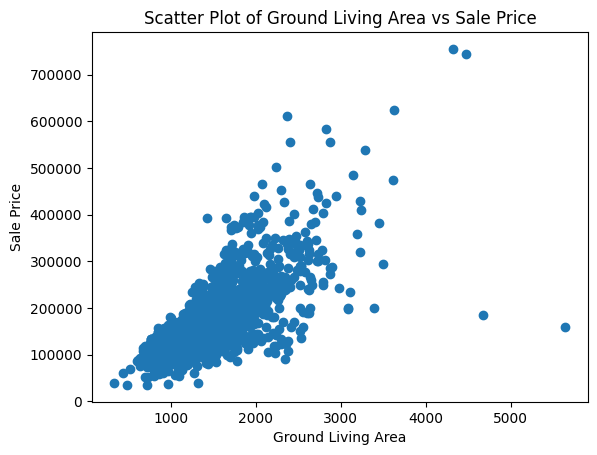

In [66]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df)
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Ground Living Area vs Sale Price")

In [67]:
df.query('GrLivArea > 4500')[['Id', 'GrLivArea', 'SalePrice']]
#524, 1299

,Id,GrLivArea,SalePrice
523,524,4676,184750
1298,1299,5642,160000


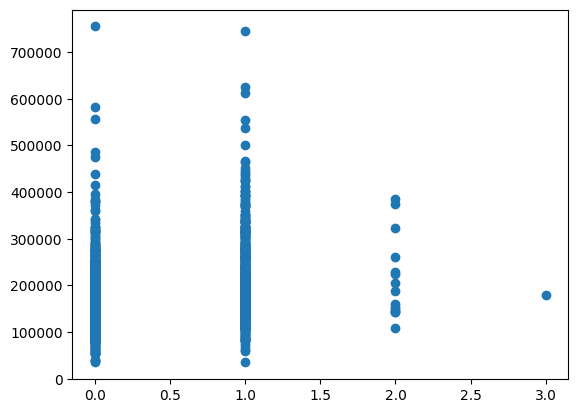

In [68]:
plt.scatter(x = 'BsmtFullBath', y ='SalePrice', data = df)

Text(0.5, 1.0, 'Scatter Plot of Basement Half Bath vs Sale Price')

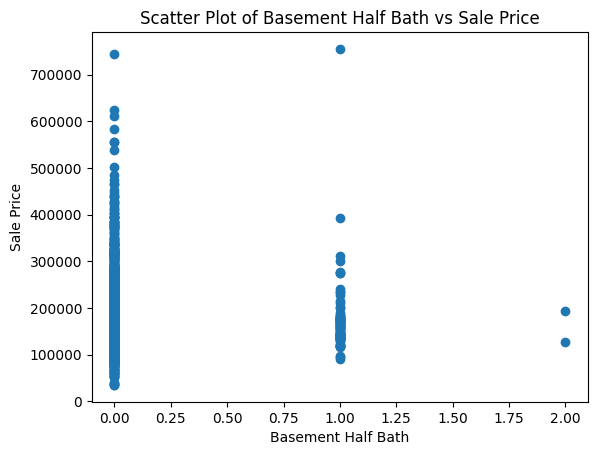

In [69]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = df)
plt.xlabel("Basement Half Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Half Bath vs Sale Price")

In [70]:
np.unique(stats.zscore(df['BsmtHalfBath']))

array([-0.24106104,  3.94880935,  8.13867973])

In [71]:
df.query('BsmtHalfBath > 1')[['Id', 'BsmtHalfBath', 'SalePrice']]
# 598 , 955
set_of_outliers.add(598)
set_of_outliers.add(955)

Text(0.5, 1.0, 'Scatter Plot of Full Bath vs Sale Price')

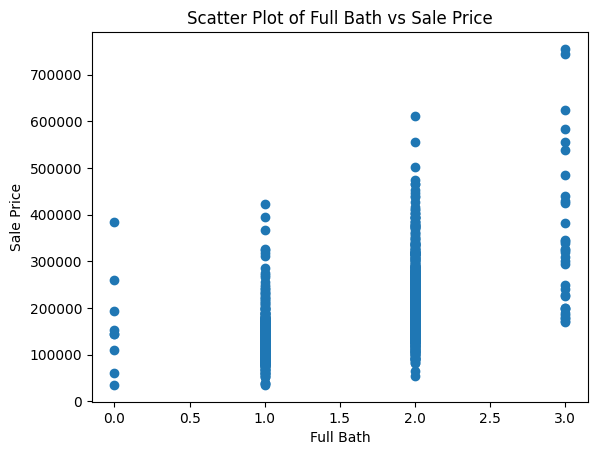

In [72]:
plt.scatter(x='FullBath', y='SalePrice', data=df)
plt.xlabel("Full Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Full Bath vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Half Bath vs Sale Price')

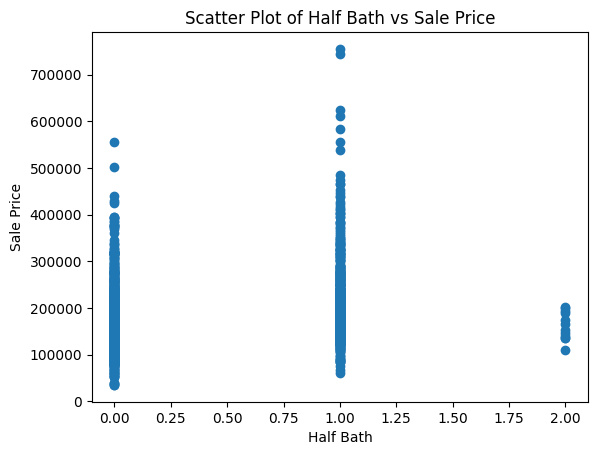

In [73]:
plt.scatter(x='HalfBath', y='SalePrice', data=df)
plt.xlabel("Half Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Half Bath vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Bedroom Above Ground vs Sale Price')

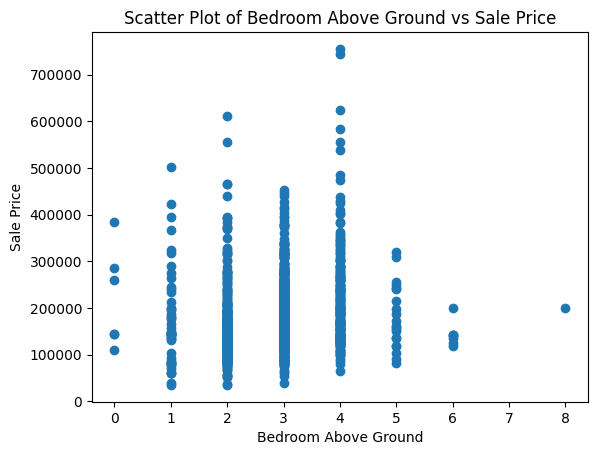

In [74]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data = df)
plt.xlabel("Bedroom Above Ground")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Bedroom Above Ground vs Sale Price")

In [75]:
df.query('BedroomAbvGr == 8')
#636
set_of_outliers.add(636)

Text(0.5, 1.0, 'Scatter Plot of Kitchen Above Ground vs Sale Price')

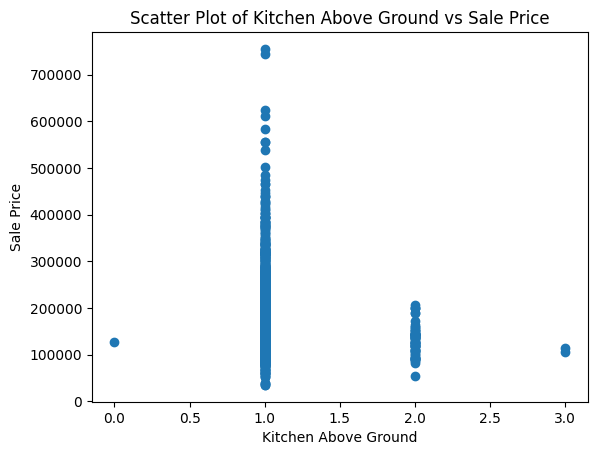

In [76]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df)
plt.xlabel("Kitchen Above Ground")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Kitchen Above Ground vs Sale Price")

In [77]:
df.query('KitchenAbvGr == 3')
#49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64

Text(0.5, 1.0, 'Scattber Plot of Total Rooms Above Ground vs Sale Price')

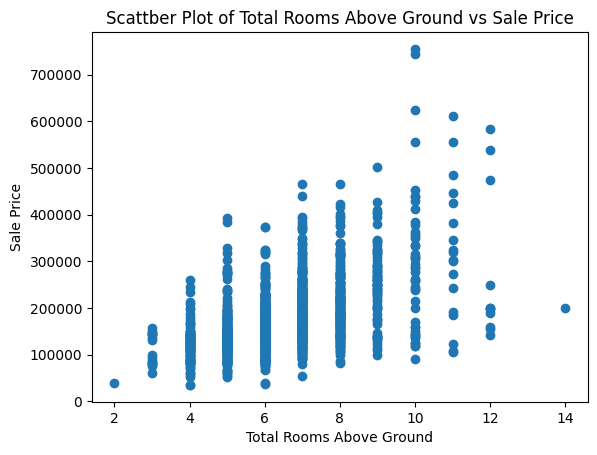

In [78]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Sale Price")
plt.title("Scattber Plot of Total Rooms Above Ground vs Sale Price")

In [79]:
df.query('TotRmsAbvGrd == 14')
#636
set_of_outliers.add(636)

Text(0.5, 1.0, 'Scatter Plot of Fireplaces vs Sale Price')

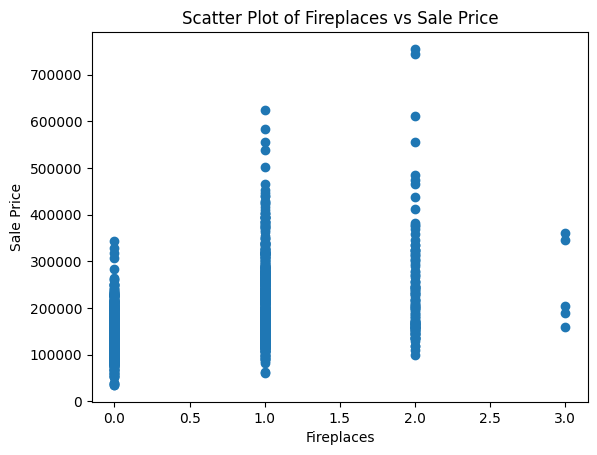

In [80]:
plt.scatter(x='Fireplaces', y='SalePrice', data= df)
plt.xlabel("Fireplaces")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Fireplaces vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Garage Cars vs Sale Price')

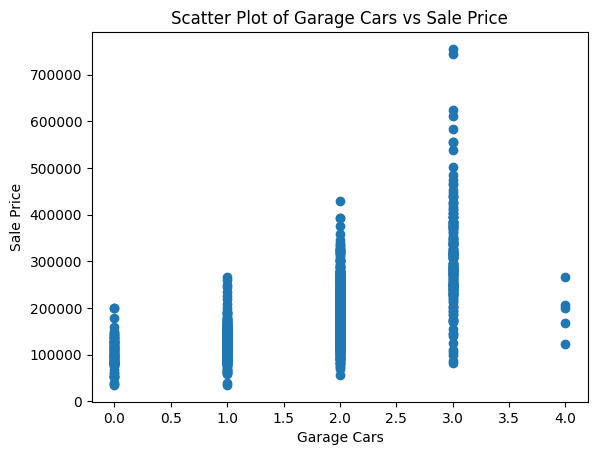

In [81]:
plt.scatter(x='GarageCars', y='SalePrice', data=df)
plt.xlabel("Garage Cars")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Garage Cars vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Garage Area vs Sale Price')

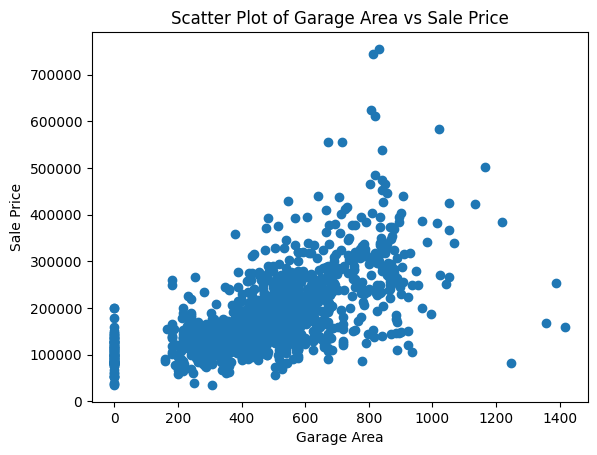

In [82]:
plt.scatter(x='GarageArea', y='SalePrice', data=df)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Garage Area vs Sale Price")


In [83]:
df.query('GarageArea > 1200')
#1062, 1191
set_of_outliers.add(1062)
set_of_outliers.add(1191)

Text(0.5, 1.0, 'Scatter Plot of Wood Deck Area vs Sale Price')

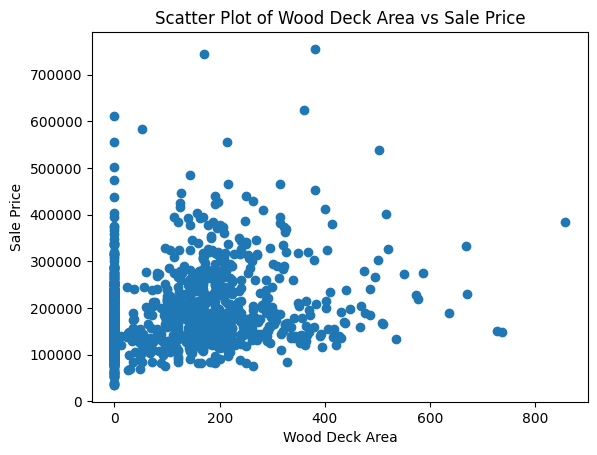

In [84]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df)
plt.xlabel("Wood Deck Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Wood Deck Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Open Porch Area vs Sale Price')

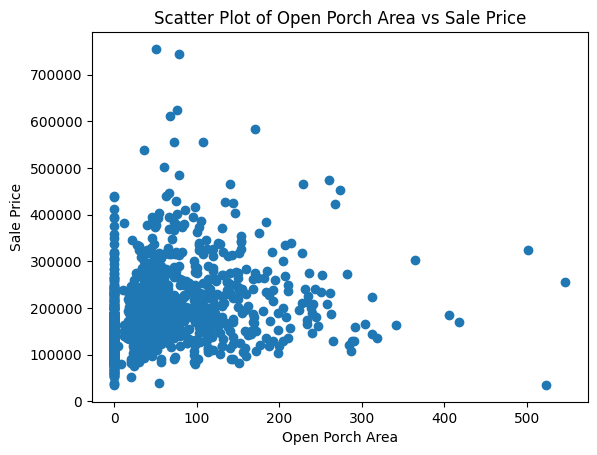

In [85]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df)
plt.xlabel("Open Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Open Porch Area vs Sale Price")

In [86]:
df.query('OpenPorchSF > 500')
#496
set_of_outliers.add(496)

Text(0.5, 1.0, 'Scatter Plot of Enclosed Porch Area vs Sale Price')

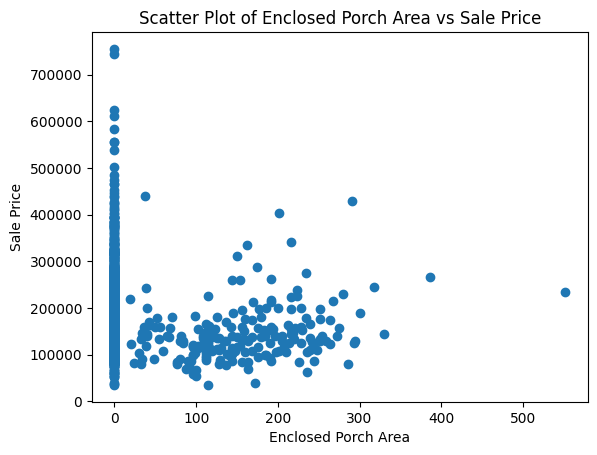

In [87]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df)
plt.xlabel("Enclosed Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Enclosed Porch Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of 3 Season Porch Area vs Sale Price')

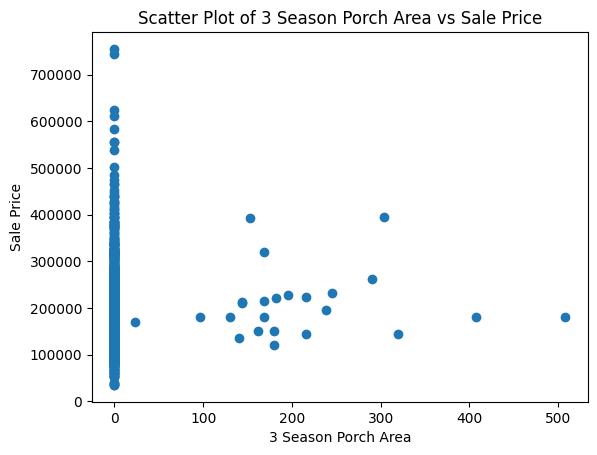

In [88]:
plt.scatter(x='3SsnPorch', y='SalePrice', data = df)
plt.xlabel("3 Season Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of 3 Season Porch Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Screen Porch Area vs Sale Price')

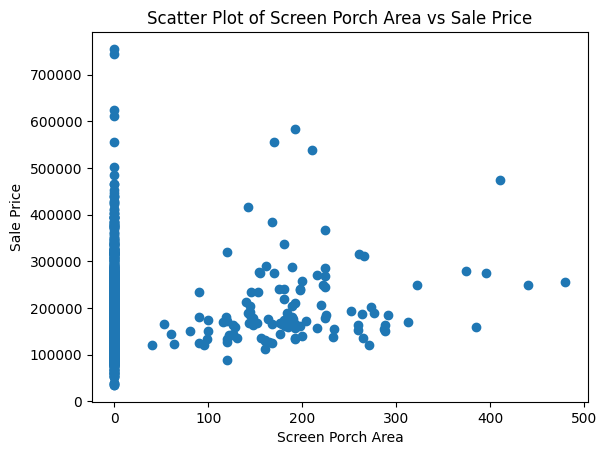

In [89]:
plt.scatter(x='ScreenPorch', y='SalePrice', data= df)
plt.xlabel("Screen Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Screen Porch Area vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Pool Area vs Sale Price')

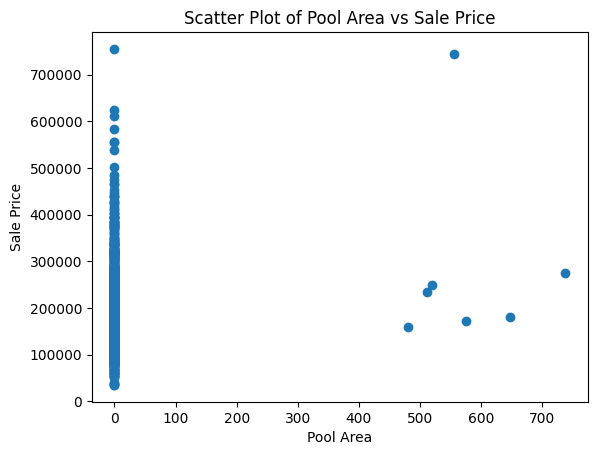

In [90]:
plt.scatter(x='PoolArea', y='SalePrice', data=df)
plt.xlabel("Pool Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Pool Area vs Sale Price")

Now we will remove all rows containing outliers.

Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or errors in measurement. Removing outliers is important for several reasons:

1. **Improved Accuracy**: Outliers can skew the results of statistical analyses and machine learning models, leading to inaccurate conclusions. By removing them, we ensure that our models are trained on data that better represents the underlying patterns.

2. **Enhanced Performance**: Machine learning algorithms, especially those sensitive to distance metrics (like k-nearest neighbors or clustering algorithms), can be heavily influenced by outliers. Removing outliers can lead to better model performance and more reliable predictions.

3. **Better Visualization**: Outliers can distort visualizations, making it difficult to understand the true distribution and relationships within the data. Removing them helps in creating clearer and more interpretable plots.

4. **Data Integrity**: Outliers can sometimes indicate errors or anomalies in data collection. Removing these ensures that the dataset is clean and reliable.

However, it's important to carefully consider the context and the method used to identify outliers, as removing too many data points can also lead to loss of valuable information.

In [91]:
rows_to_drop = list(set_of_outliers)  # Convert the set to a list
df  = df.drop(rows_to_drop, axis=0)

By performing these steps, you can quickly identify which columns in your DataFrame have the most missing data. This is useful for data cleaning and preprocessing, as it helps you decide which columns might need imputation, removal, or further investigation due to a high number of missing values.

In [92]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(30)

,0
PoolQC,1434
MiscFeature,1387
Alley,1353
Fence,1163
MasVnrType,863
FireplaceQu,681
LotFrontage,256
GarageYrBlt,78
GarageCond,78
GarageType,78


In [93]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [94]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

### Why We Fill Missing Values in `Alley`

The `Alley` column contains `NaN` values, which likely indicate that the property does not have alley access. Instead of leaving these as missing values, we replace them with `'No'` to preserve the information that these properties lack an alley. This approach is taken for the following reasons:

1. **Preserving Meaningful Information**:
   - Missing values in this context (`NaN`) are not random but signify a specific condition: no alley access. By filling them with `'No'`, we retain this meaningful distinction.

2. **Data Consistency**:
   - Filling missing values ensures that all rows have a valid category, making the dataset easier to analyze and use in machine learning models without errors.

3. **Avoiding Data Loss**:
   - Dropping rows with missing values would result in losing potentially valuable data, which we aim to avoid.

By filling missing values in both the training and testing datasets, we ensure consistency across the data preparation process.


In [95]:
df['Alley'] = df['Alley'].fillna('No')
test_df['Alley'] = test_df['Alley'].fillna('No')

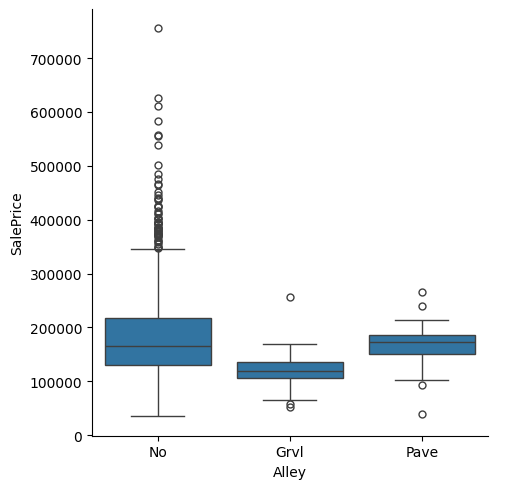

In [96]:
sns.catplot(data=df, x='Alley', y='SalePrice', kind='box')

In [97]:
df['Alley'].value_counts()

Alley
No      1353
Grvl      47
Pave      40
Name: count, dtype: int64